In [39]:
import matplotlib.pyplot as plt
import cv2
import glob
import numpy as np
from PIL import Image

In [4]:
annotated_imgs = glob.glob("C:\\Users\\97254\\Desktop\\msc\\RePAIR\\Segmentation Dataset - Copy\\cropped_resized_masks\*.png")
annotated_imgs[:5]

['C:\\Users\\97254\\Desktop\\msc\\RePAIR\\Segmentation Dataset - Copy\\cropped_resized_masks\\Decor1_RPf_00194_mesh_segmented_group_28_label_ground-truth_semantic.png',
 'C:\\Users\\97254\\Desktop\\msc\\RePAIR\\Segmentation Dataset - Copy\\cropped_resized_masks\\Decor1_RPf_00195_mesh_segmented_group_28_label_ground-truth_semantic.png',
 'C:\\Users\\97254\\Desktop\\msc\\RePAIR\\Segmentation Dataset - Copy\\cropped_resized_masks\\Decor1_RPf_00196_mesh_segmented_group_28_label_ground-truth_semantic.png',
 'C:\\Users\\97254\\Desktop\\msc\\RePAIR\\Segmentation Dataset - Copy\\cropped_resized_masks\\Decor1_RPf_00197_mesh_segmented_group_28_label_ground-truth_semantic.png',
 'C:\\Users\\97254\\Desktop\\msc\\RePAIR\\Segmentation Dataset - Copy\\cropped_resized_masks\\Decor1_RPf_00198_mesh_segmented_group_28_label_ground-truth_semantic.png']

In [25]:
i = 0


img = cv2.imread(annotated_imgs[i])
print(np.unique(img))

[ 0  1  4  5  7 15]


In [16]:
img.shape

(256, 256, 3)

In [44]:


label2color = {
    (0,0,0):(255,255,255),
    (1,1,1):(255,255,0),
    (4,4,4):(255,0,255),
    (5,5,5):(255,0,0),
    (7,7,7):(0,255,255),
    (15,15,15):(0,0,255)
}

label2color_2 = {
    (0,0,0):(0,0,0),
    (1,1,1):(0,0,0),
    (4,4,4):(0,0,255),
    (5,5,5):(0,0,0),
    (7,7,7):(0,0,0),
    (15,15,15):(0,0,0)
}

In [40]:
def map_pixel_values(image_path, pixel_mapping):
    # Open the image
    image = Image.open(image_path)
    # Convert the image to RGB mode if it's not already
    image = image.convert("RGB")

    # Create a new image with the same size and mode
    mapped_image = Image.new(image.mode, image.size)

    # Get the pixel data from the original image
    pixels = image.load()

    # Iterate over each pixel in the image
    for x in range(image.width):
        for y in range(image.height):
            # Get the original pixel value
            original_pixel = pixels[x, y]

            # Map the original pixel value to the new value
            mapped_pixel = pixel_mapping.get(original_pixel, original_pixel)

            # Set the mapped pixel value in the new image
            mapped_image.putpixel((x, y), mapped_pixel)

    # Return the mapped image
    return mapped_image

In [45]:
mapped_image = map_pixel_values(annotated_imgs[0],label2color_2)

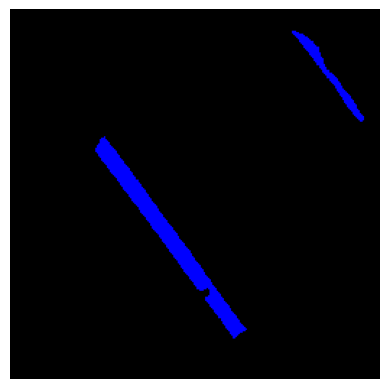

In [46]:
# Display the mapped image using plt.imshow
plt.imshow(mapped_image)
plt.axis('off')  # Remove axis ticks and labels
plt.show()

[0.         0.01568628 0.05882353]


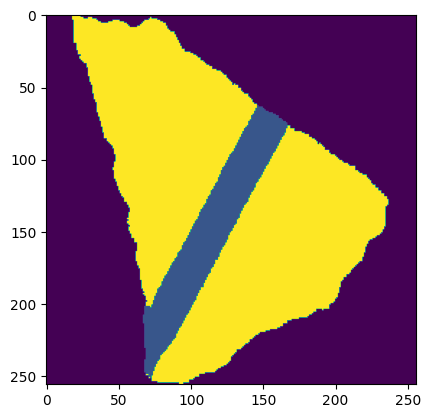

In [50]:
path = "C:\\Users\\97254\\Desktop\\msc\\RePAIR\\Segmentation Dataset - Copy\\cropped_resized_masks\\Decor2_RPf_00629_intact_mesh_group_66_label_ground-truth_semantic.png"
img_2 = plt.imread(path)
plt.imshow(img_2)
print(np.unique(img_2))
label2color_3 = {
    (0,0,0):(255,255,255),
    (0.01568628,0.01568628,0.01568628):(255,255,0),
    (0.05882353,0.05882353,0.05882353):(255,0,255)
}


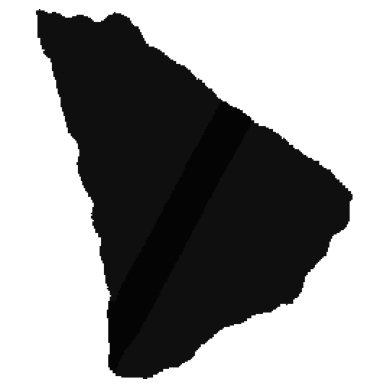

In [51]:
mapped_image_2 = map_pixel_values(path,label2color_3)
plt.imshow(mapped_image_2)
plt.axis('off')  # Remove axis ticks and labels
plt.show()

In [54]:
images_with_red_band = []
for i,curr_path in enumerate(annotated_imgs):
    print(f"checking for image ({i+1}/{len(annotated_imgs)})")
    img = cv2.imread(curr_path)
    labels = np.unique(img)
    if 4 in labels:
        print(f"Adding image {curr_path}")
        images_with_red_band.append(curr_path)

checking for image (1/383)
Adding image C:\Users\97254\Desktop\msc\RePAIR\Segmentation Dataset - Copy\cropped_resized_masks\Decor1_RPf_00194_mesh_segmented_group_28_label_ground-truth_semantic.png
checking for image (2/383)
checking for image (3/383)
checking for image (4/383)
Adding image C:\Users\97254\Desktop\msc\RePAIR\Segmentation Dataset - Copy\cropped_resized_masks\Decor1_RPf_00197_mesh_segmented_group_28_label_ground-truth_semantic.png
checking for image (5/383)
checking for image (6/383)
checking for image (7/383)
checking for image (8/383)
checking for image (9/383)
Adding image C:\Users\97254\Desktop\msc\RePAIR\Segmentation Dataset - Copy\cropped_resized_masks\Decor1_RPf_00202_mesh_segmented_group_28_label_ground-truth_semantic.png
checking for image (10/383)
Adding image C:\Users\97254\Desktop\msc\RePAIR\Segmentation Dataset - Copy\cropped_resized_masks\Decor1_RPf_00203_mesh_segmented_group_28_label_ground-truth_semantic.png
checking for image (11/383)
checking for image (1

In [55]:
len(images_with_red_band)

155

In [57]:
with open("fragments_with_bands.txt","w")as f:
    f.write('\r\n'.join(images_with_red_band))